In [1]:
!pip install nltk

In [7]:
pip install python-docx

  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184508 sha256=de97170984c788df280b5cebdb5095c076bead35daee91937ac0ccce02fb1d79
  Stored in directory: c:\users\cristina\appdata\local\pip\cache\wheels\83\8b\7c\09ae60c42c7ba4ed2dddaf2b8b9186cb105255856d6ed3dba5
Successfully built python-docx
Note: you may need to restart the kernel to use updated packages.


In [53]:
pip install text2emotion

Note: you may need to restart the kernel to use updated packages.
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193021 sha256=9473724549781005a1412f7ba022d4bd27ce380611d6279e2a35609453cdb5cc
  Stored in directory: c:\users\cristina\appdata\local\pip\cache\wheels\0e\d1\c5\63b511b700c9da5a62bbfc758dd4a3fd9541df51b5db0694b0
Successfully built emoji


In [1]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cristina\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cristina\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [56]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Cristina\AppData\Roaming\nltk_data...


True

In [1]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.probability import FreqDist
from docx import Document
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import text2emotion as te   

import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cristina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cristina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Cristina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [74]:
pip install emoji==1.2

  Attempting uninstall: emoji
    Found existing installation: emoji 1.5.0
    Uninstalling emoji-1.5.0:
      Successfully uninstalled emoji-1.5.0
Note: you may need to restart the kernel to use updated packages.


# M09 T01

### Text sentiment analysis

<u>*Exercice 1*<u>

*Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.*

In [2]:
import docx

def getText(filename):
    #This function parses docx files and returns a list of strings args: path of the file returns: list of strings 
    #containing the text which are splitted by new line
    count = 0
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        # Making sure that empty string does not append into the list
        if len(para.text) > 3:
            fullText.append(para.text)
    return fullText

In [3]:
text = getText('Main reasons for abandoning a pet animal.docx')
text

['Main reasons for abandoning a pet animal',
 'Reasons for abandoning dogs and cats',
 "According to the latest Affinity Foundation study “He would never do it” into animal abandonment, the main reasons for abandoning dogs and cats in Spain last year were once again unwanted litters (15.3%), the end of the hunting season (12.6%), the animal's problematic behaviour (10.8%), economic factors (10.7%), loss of interest in the animal (9.8%) and changes of residence (8.9%).",
 'Among the less frequent reasons for abandonment we find allergies in one the family members (4.4%), the birth of a child (3.9%), admission to hospital or death of the owner (6.0%), holidays (1.2%) and the fear of contracting toxoplasmosis during pregnancy (0.5%).',
 '\nWhen living with a pet animal is not a success',
 'Many people enjoy the company of a dog or cat and would never consider getting rid of their pet animal who is seen as another member of the family. Nevertheless, in many cases the coexistence of humans 

In [4]:
text_str = ' '.join(text)
text_str

"Main reasons for abandoning a pet animal Reasons for abandoning dogs and cats According to the latest Affinity Foundation study “He would never do it” into animal abandonment, the main reasons for abandoning dogs and cats in Spain last year were once again unwanted litters (15.3%), the end of the hunting season (12.6%), the animal's problematic behaviour (10.8%), economic factors (10.7%), loss of interest in the animal (9.8%) and changes of residence (8.9%). Among the less frequent reasons for abandonment we find allergies in one the family members (4.4%), the birth of a child (3.9%), admission to hospital or death of the owner (6.0%), holidays (1.2%) and the fear of contracting toxoplasmosis during pregnancy (0.5%). \nWhen living with a pet animal is not a success Many people enjoy the company of a dog or cat and would never consider getting rid of their pet animal who is seen as another member of the family. Nevertheless, in many cases the coexistence of humans and animals is not al

In [5]:
#Sentence tokenizer breaks text paragraph into sentences.

tokenized_text=sent_tokenize(text_str)
print(tokenized_text)

["Main reasons for abandoning a pet animal Reasons for abandoning dogs and cats According to the latest Affinity Foundation study “He would never do it” into animal abandonment, the main reasons for abandoning dogs and cats in Spain last year were once again unwanted litters (15.3%), the end of the hunting season (12.6%), the animal's problematic behaviour (10.8%), economic factors (10.7%), loss of interest in the animal (9.8%) and changes of residence (8.9%).", 'Among the less frequent reasons for abandonment we find allergies in one the family members (4.4%), the birth of a child (3.9%), admission to hospital or death of the owner (6.0%), holidays (1.2%) and the fear of contracting toxoplasmosis during pregnancy (0.5%).', 'When living with a pet animal is not a success Many people enjoy the company of a dog or cat and would never consider getting rid of their pet animal who is seen as another member of the family.', 'Nevertheless, in many cases the coexistence of humans and animals i

In [6]:
#Word tokenizer breaks text paragraph into words.

from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text_str)
print(tokenized_word)

['Main', 'reasons', 'for', 'abandoning', 'a', 'pet', 'animal', 'Reasons', 'for', 'abandoning', 'dogs', 'and', 'cats', 'According', 'to', 'the', 'latest', 'Affinity', 'Foundation', 'study', '“', 'He', 'would', 'never', 'do', 'it', '”', 'into', 'animal', 'abandonment', ',', 'the', 'main', 'reasons', 'for', 'abandoning', 'dogs', 'and', 'cats', 'in', 'Spain', 'last', 'year', 'were', 'once', 'again', 'unwanted', 'litters', '(', '15.3', '%', ')', ',', 'the', 'end', 'of', 'the', 'hunting', 'season', '(', '12.6', '%', ')', ',', 'the', 'animal', "'s", 'problematic', 'behaviour', '(', '10.8', '%', ')', ',', 'economic', 'factors', '(', '10.7', '%', ')', ',', 'loss', 'of', 'interest', 'in', 'the', 'animal', '(', '9.8', '%', ')', 'and', 'changes', 'of', 'residence', '(', '8.9', '%', ')', '.', 'Among', 'the', 'less', 'frequent', 'reasons', 'for', 'abandonment', 'we', 'find', 'allergies', 'in', 'one', 'the', 'family', 'members', '(', '4.4', '%', ')', ',', 'the', 'birth', 'of', 'a', 'child', '(', '3.9

In [7]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 303 samples and 714 outcomes>


In [8]:
#50 most repeated words

fdist.most_common(50)

[('the', 34),
 ('.', 24),
 (',', 23),
 ('of', 23),
 ('to', 21),
 ('a', 19),
 ('animal', 19),
 ('and', 18),
 ('in', 17),
 ('for', 13),
 ('%', 12),
 ('(', 11),
 (')', 11),
 ('with', 10),
 ('pet', 8),
 ('or', 8),
 ('it', 7),
 ('not', 7),
 ('be', 7),
 ('abandonment', 6),
 ('family', 6),
 ('is', 6),
 ('are', 6),
 ('you', 6),
 ('dog', 5),
 ('cat', 5),
 ('who', 5),
 ('will', 5),
 ("'s", 4),
 ('we', 4),
 ('people', 4),
 ('their', 4),
 ('coexistence', 4),
 ('animals', 4),
 ('commitment', 4),
 ('our', 4),
 ('which', 4),
 ('reasons', 3),
 ('abandoning', 3),
 ('do', 3),
 ('another', 3),
 ('many', 3),
 ('cases', 3),
 ('relationship', 3),
 ('If', 3),
 ('an', 3),
 ('can', 3),
 ('help', 3),
 ('possible', 3),
 ('there', 3)]

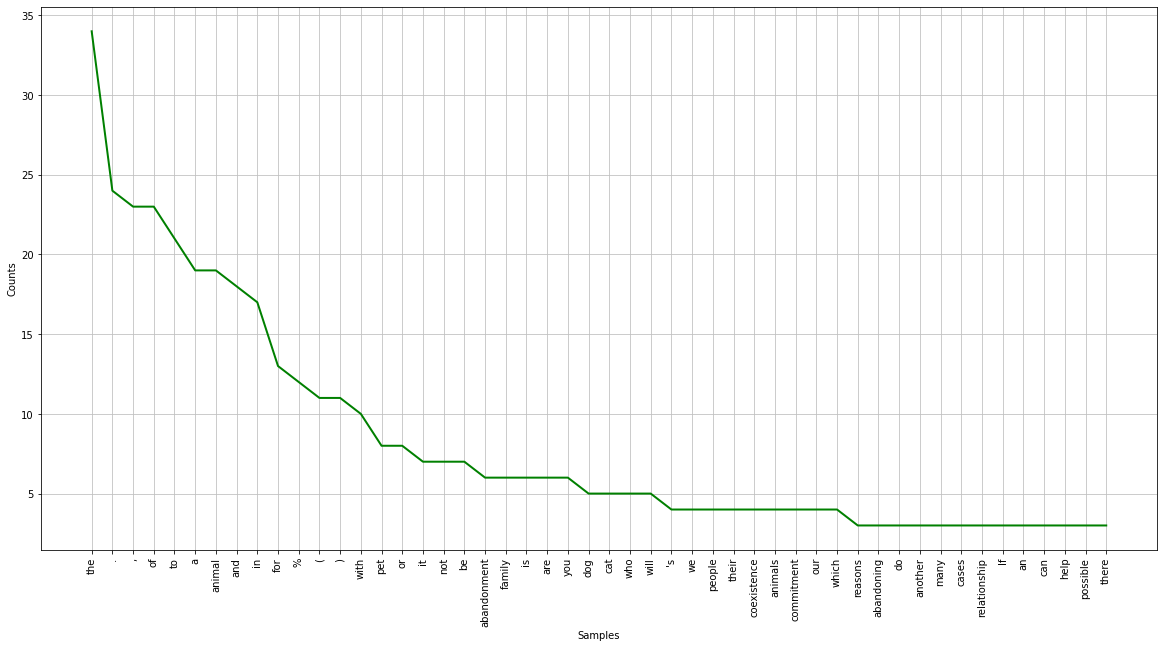

In [9]:
#visualization of the 50 most repeated words

fig = plt.figure(figsize = (20,10))
fdist.plot(50,cumulative=False, color = "green")
plt.show()

As we can see in the chart above, the most frequent words in the text are stop words (words as the, this, a, an, is...). They are not descriptive of the content of your text, so it is necessary to remove them.

<u>*Exercice 2*<u>

*Treu les stopwords i realitza stemming al teu conjunt de dades.*

In [10]:
#Stopwords considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc.

stop_words=set(stopwords.words("english"))
print(stop_words)

{'only', 'that', 'with', 'below', "you'd", 'between', 'because', 'aren', 'himself', 'doesn', 'what', 'under', 'of', 'wasn', "hadn't", 'weren', 'shouldn', 'whom', 'myself', 'yours', 'o', 'did', 'where', "you've", "you're", 'hadn', 'by', 'through', "wasn't", 'them', 'are', 'how', 'should', 'being', 'before', 'i', 'no', 'her', 'over', 'out', 'they', 'my', 'this', "weren't", 'his', 'been', 'why', 'mustn', 'we', 'him', "shouldn't", 'do', 'ourselves', 'here', 'does', 'after', 'same', "shan't", 'when', 'own', 'ain', 'me', "that'll", 'd', 'had', "mustn't", "didn't", 'now', 'll', 'those', 've', "won't", 'themselves', 'but', 'the', 'most', 'too', "haven't", 're', "mightn't", 'our', 'he', 'has', 'am', 'their', 'as', 'wouldn', 'herself', 'while', 'couldn', "aren't", 'can', "needn't", 'in', 's', "doesn't", "you'll", 'yourselves', 'to', 'then', 'you', 'having', 'some', 'up', 'once', "couldn't", 'hasn', 'it', 'nor', 'more', 'each', 'didn', 'such', 'all', 'other', 'further', 'hers', "should've", 'abov

In [11]:
#remove stopwords

filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words and w not in (',', '.', '(', ')', '%', "'s"): # I added some more stopwords/characters to remove
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filtered Sentence:",filtered_sent)

Tokenized Sentence: ['Main', 'reasons', 'for', 'abandoning', 'a', 'pet', 'animal', 'Reasons', 'for', 'abandoning', 'dogs', 'and', 'cats', 'According', 'to', 'the', 'latest', 'Affinity', 'Foundation', 'study', '“', 'He', 'would', 'never', 'do', 'it', '”', 'into', 'animal', 'abandonment', ',', 'the', 'main', 'reasons', 'for', 'abandoning', 'dogs', 'and', 'cats', 'in', 'Spain', 'last', 'year', 'were', 'once', 'again', 'unwanted', 'litters', '(', '15.3', '%', ')', ',', 'the', 'end', 'of', 'the', 'hunting', 'season', '(', '12.6', '%', ')', ',', 'the', 'animal', "'s", 'problematic', 'behaviour', '(', '10.8', '%', ')', ',', 'economic', 'factors', '(', '10.7', '%', ')', ',', 'loss', 'of', 'interest', 'in', 'the', 'animal', '(', '9.8', '%', ')', 'and', 'changes', 'of', 'residence', '(', '8.9', '%', ')', '.', 'Among', 'the', 'less', 'frequent', 'reasons', 'for', 'abandonment', 'we', 'find', 'allergies', 'in', 'one', 'the', 'family', 'members', '(', '4.4', '%', ')', ',', 'the', 'birth', 'of', 'a'

In [12]:
fdist_stopwords = FreqDist(filtered_sent)
print(fdist_stopwords)

<FreqDist with 241 samples and 348 outcomes>


In [13]:
#50 most repeated words after removing stopwords

fdist_stopwords.most_common(50)

[('animal', 19),
 ('pet', 8),
 ('abandonment', 6),
 ('family', 6),
 ('dog', 5),
 ('cat', 5),
 ('people', 4),
 ('coexistence', 4),
 ('animals', 4),
 ('commitment', 4),
 ('reasons', 3),
 ('abandoning', 3),
 ('another', 3),
 ('many', 3),
 ('cases', 3),
 ('relationship', 3),
 ('If', 3),
 ('help', 3),
 ('possible', 3),
 ('adopting', 3),
 ('dogs', 2),
 ('cats', 2),
 ('would', 2),
 ('never', 2),
 ('main', 2),
 ('Spain', 2),
 ('unwanted', 2),
 ('litters', 2),
 ('behaviour', 2),
 ('find', 2),
 ('living', 2),
 ('enjoy', 2),
 ('company', 2),
 ('problems', 2),
 ('together', 2),
 ('person', 2),
 ('take', 2),
 ('care', 2),
 ('best', 2),
 ('It', 2),
 ('sure', 2),
 ('contact', 2),
 ('shelters', 2),
 ('responsibility', 2),
 ('live', 2),
 ('still', 2),
 ('terms', 2),
 ('The', 2),
 ('healthy', 2),
 ('case', 2)]

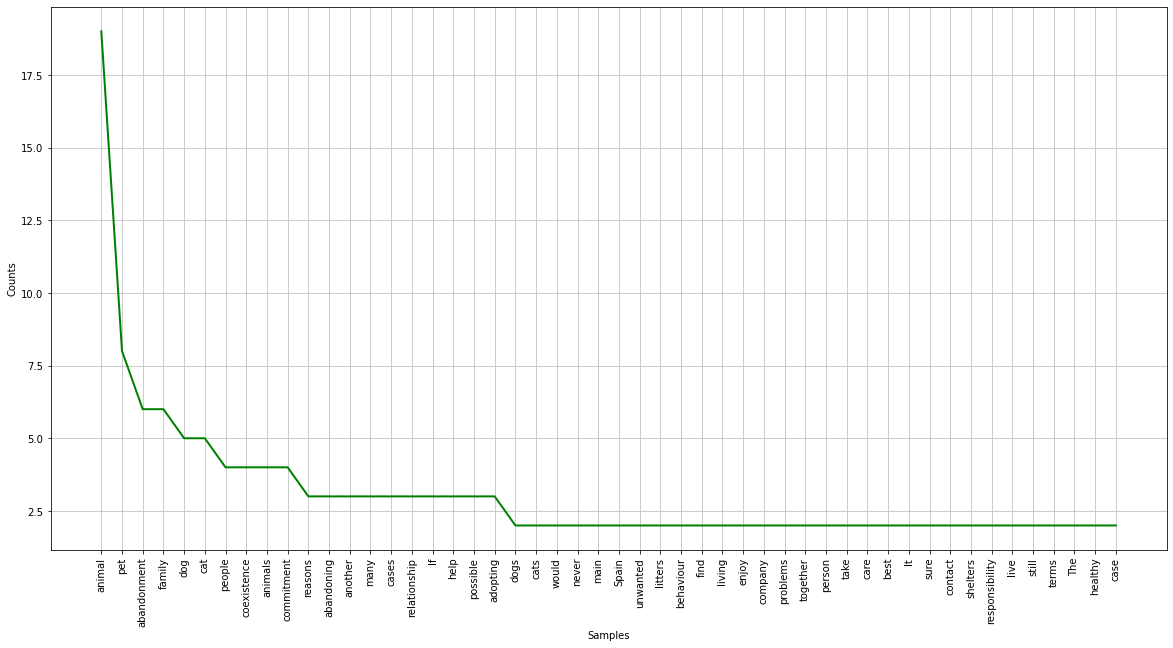

In [14]:
#visualization of the 50 most repeated words

fig = plt.figure(figsize = (20,10))
fdist_stopwords.plot(50,cumulative=False, color = "green")
plt.show()

The type of most frequent words is totally different after removing the stopwords. Now, they reflect the topic of the text. 

In [15]:
#Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational
#affixes.

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Main', 'reasons', 'abandoning', 'pet', 'animal', 'Reasons', 'abandoning', 'dogs', 'cats', 'According', 'latest', 'Affinity', 'Foundation', 'study', '“', 'He', 'would', 'never', '”', 'animal', 'abandonment', 'main', 'reasons', 'abandoning', 'dogs', 'cats', 'Spain', 'last', 'year', 'unwanted', 'litters', '15.3', 'end', 'hunting', 'season', '12.6', 'animal', 'problematic', 'behaviour', '10.8', 'economic', 'factors', '10.7', 'loss', 'interest', 'animal', '9.8', 'changes', 'residence', '8.9', 'Among', 'less', 'frequent', 'reasons', 'abandonment', 'find', 'allergies', 'one', 'family', 'members', '4.4', 'birth', 'child', '3.9', 'admission', 'hospital', 'death', 'owner', '6.0', 'holidays', '1.2', 'fear', 'contracting', 'toxoplasmosis', 'pregnancy', '0.5', 'When', 'living', 'pet', 'animal', 'success', 'Many', 'people', 'enjoy', 'company', 'dog', 'cat', 'would', 'never', 'consider', 'getting', 'rid', 'pet', 'animal', 'seen', 'another', 'member', 'family', 'Nevertheless', 'ma

In [16]:
fdist_stem = FreqDist(stemmed_words)
print(fdist_stem)

<FreqDist with 214 samples and 348 outcomes>


In [17]:
#50 most repeated words after performing stemming

fdist_stem.most_common(50)

[('anim', 23),
 ('abandon', 9),
 ('pet', 8),
 ('dog', 7),
 ('cat', 7),
 ('famili', 6),
 ('adopt', 6),
 ('case', 5),
 ('reason', 4),
 ('live', 4),
 ('mani', 4),
 ('peopl', 4),
 ('coexist', 4),
 ('commit', 4),
 ('possibl', 4),
 ('respons', 4),
 ('main', 3),
 ('behaviour', 3),
 ('find', 3),
 ('anoth', 3),
 ('relationship', 3),
 ('if', 3),
 ('help', 3),
 ('would', 2),
 ('never', 2),
 ('spain', 2),
 ('unwant', 2),
 ('litter', 2),
 ('interest', 2),
 ('member', 2),
 ('success', 2),
 ('enjoy', 2),
 ('compani', 2),
 ('consid', 2),
 ('nevertheless', 2),
 ('problem', 2),
 ('togeth', 2),
 ('person', 2),
 ('take', 2),
 ('care', 2),
 ('best', 2),
 ('it', 2),
 ('look', 2),
 ('sure', 2),
 ('contact', 2),
 ('shelter', 2),
 ('awar', 2),
 ('still', 2),
 ('term', 2),
 ('the', 2)]

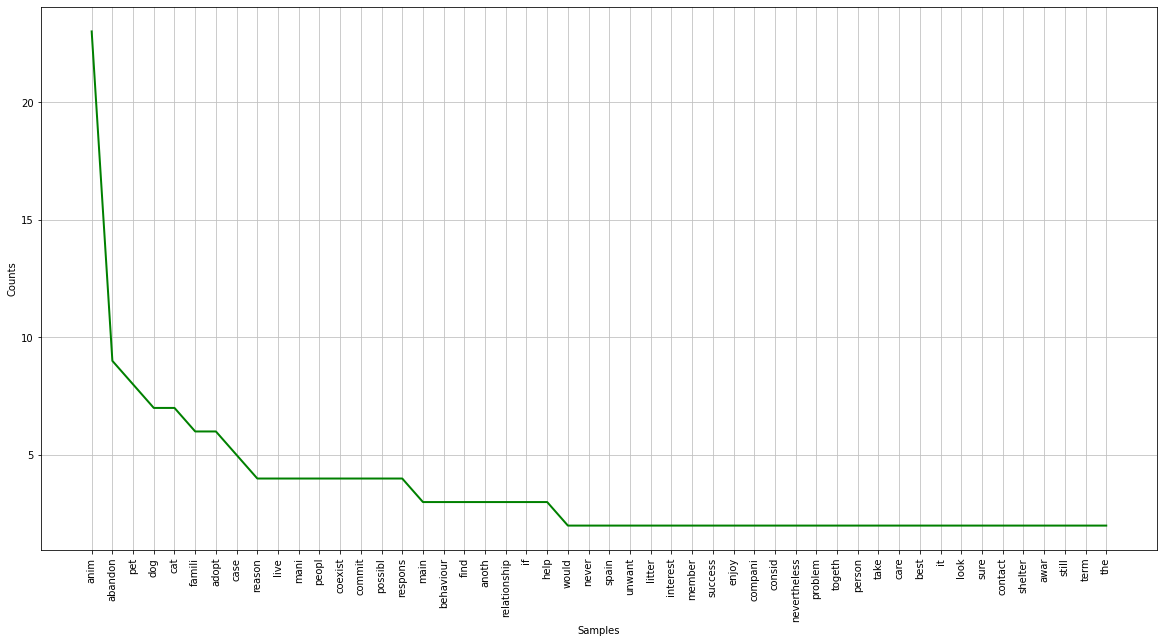

In [18]:
#visualization of the 50 most repeated words

fig = plt.figure(figsize = (20,10))
fdist_stem.plot(50,cumulative=False, color = "green")
plt.show()

<u>*Exercice 3*<u>

*Realitza sentiment analysis al teu conjunt de dades.*

We will use two tools to perform the sentimen analysis:

- The .polarity_scores method of SentimentIntensityAnalyzer(), intended to analyse the negative/positive/neutral words.


- text2emotion is another python package which extracts the emotions from the content. It processes any textual message and recognize the emotions embedded in it. It is compatible with 5 different emotion categories as Happy, Angry, Sad, Surprise and Fear.

In [19]:
sentiment = SentimentIntensityAnalyzer()
sentiment.polarity_scores(text_str)

{'neg': 0.1, 'neu': 0.761, 'pos': 0.139, 'compound': 0.9782}

In [20]:
te.get_emotion(text_str)

{'Happy': 0.15, 'Angry': 0.02, 'Surprise': 0.19, 'Sad': 0.32, 'Fear': 0.32}

## Conclusions

- If we delete the stopwords, the most frequent words are "animal", "abandon", "pet", "dog" and "cat" so we can get a general idea about what is the text about without even reading it.



- The text I have chosen to perform the sentiment analysis to is more positive than negative, though, in general, it is neutral.



- We can see that the predominant emotion in the text is sadness and fear, followed by surprise and hapiness. I think it is normal since the text is about the abandonment of dogs and cats.